# Project about dog breeds

## João Nascimento e Gustavo Ornaghi

Install dependencies

In [1]:
%pip install pandas
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Import Dependencies

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

Import csv and show initial lines

In [3]:
file_path = './Dog Breads Around The World.csv'
df = pd.read_csv(file_path)

df.head()


,Name,Origin,Type,Unique Feature,Friendly Rating (1-10),Life Span,Size,Grooming Needs,Exercise Requirements (hrs/day),Good with Children,Intelligence Rating (1-10),Shedding Level,Health Issues Risk,Average Weight (kg),Training Difficulty (1-10)
0,Affenpinscher,Germany,Toy,Monkey-like face,7,14,Small,High,1.5,Yes,8,Moderate,Low,4,6
1,Afghan Hound,Afghanistan,Hound,Long silky coat,5,13,Large,Very High,2.0,No,4,High,Moderate,25,8
2,Airedale Terrier,England,Terrier,Largest of terriers,8,12,Medium,High,2.0,Yes,7,Moderate,Low,21,6
3,Akita,Japan,Working,Strong loyalty,6,11,Large,Moderate,2.0,With Training,7,High,High,45,9
4,Alaskan Malamute,Alaska USA,Working,Strong pulling ability,7,11,Large,High,3.0,Yes,6,Very High,Moderate,36,8


preprocess

In [4]:
def preprocess_data(df):
    # column_name = "Good with Children"
    # value_to_remove = "With Training"

    # df = df[df[column_name] != value_to_remove]

    df = df.drop(columns=['Name', 'Type', 'Unique Feature'])

    label_encoders = {}
    for col in df.select_dtypes(include='object').columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

    return df, label_encoders


Split target column

In [5]:
def separate_features_and_target(df, target_col='Friendly Rating (1-10)'):
    X = df.drop(columns=target_col)
    y = df[target_col]
    return X, y

Train and test using model

In [6]:
def train_and_evaluate_model(X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = GaussianNB()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    columns_order = X_train.columns

    return model, acc, conf_matrix, columns_order

Predict with new value

In [7]:
def predict_new_value(model, new_data, label_encoders, columns_order):
    # Certifique-se de que `new_data` tenha todas as colunas no mesmo formato
    for col, le in label_encoders.items():
        if col in new_data.columns:
            try:
                new_data[col] = le.transform(new_data[col])
            except:
                new_data[col] = 0

    # Adicione quaisquer colunas faltantes com valor zero ou valor médio
    for col in columns_order:
        if col not in new_data.columns:
            new_data[col] = 0  # ou algum valor padrão, como média da coluna no treino

    # Organize `new_data` na mesma ordem de colunas que o modelo espera
    new_data = new_data[columns_order]

    # Fazer a previsão
    predicted_rating = model.predict(new_data)
    print(predicted_rating)
    return predicted_rating[0]

Execute

In [8]:
df_clean, label_encoders = preprocess_data(df)
X, y = separate_features_and_target(df_clean, target_col='Friendly Rating (1-10)')

# Treinamento e avaliação
model, accuracy, conf_matrix, columns_order = train_and_evaluate_model(X, y)

accuracy, conf_matrix

(0.375,
 array([[ 3,  2,  0,  1,  0],
        [ 2,  4,  0,  3,  0],
        [ 0,  1,  0, 10,  0],
        [ 0,  0,  0,  5,  0],
        [ 0,  0,  0,  1,  0]], dtype=int64))

Test new value

In [9]:
new_data = pd.DataFrame({
    'Origin': ['Scotland'], # Dog Origin Country
    'Life Span': [5], # Dog Life span
    'Size': ['Small'], # Dog Size
    'Good with Children': ['No'] # Dog is good with children?
})

# Prever Name
predicted_rating = predict_new_value(model, new_data, label_encoders, columns_order)
print(f"Friendly Level for this dog is: {int(predicted_rating)}")

[6]
Friendly Level for this dog is: 6


Salvando Pré Processado

In [11]:
df.drop(columns=['Name', 'Type', 'Unique Feature']).to_csv('./Dog Preprocessado.csv')

Power BI no arquivo Dashboard.pdf...

Gerando gráficos

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

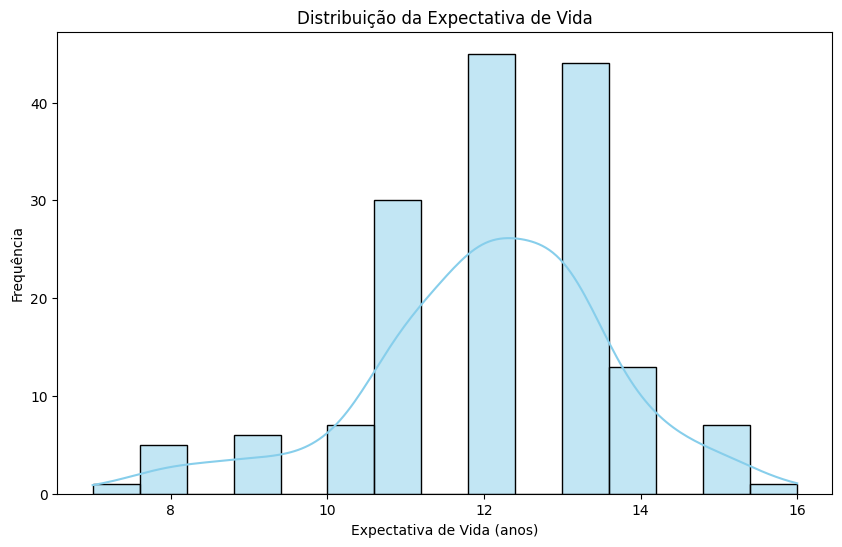

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Life Span'], kde=True, bins=15, color='skyblue')
plt.title('Distribuição da Expectativa de Vida')
plt.xlabel('Expectativa de Vida (anos)')
plt.ylabel('Frequência')
plt.show()

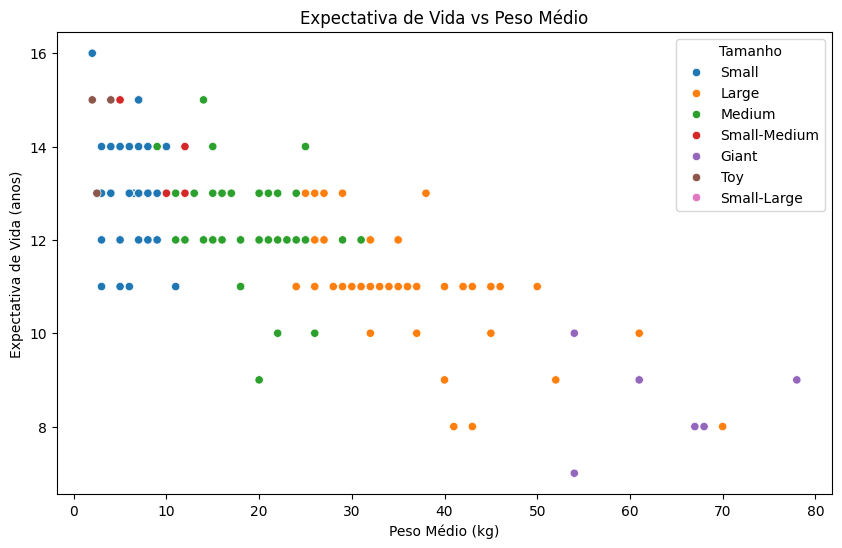

In [35]:
# Convertendo a coluna 'Average Weight (kg)' para numérico (ignora erros caso algum valor não seja número)
df['Average Weight (kg)'] = pd.to_numeric(df['Average Weight (kg)'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average Weight (kg)', y='Life Span', data=df, hue='Size')
plt.title('Expectativa de Vida vs Peso Médio')
plt.xlabel('Peso Médio (kg)')
plt.ylabel('Expectativa de Vida (anos)')
plt.legend(title='Tamanho')
plt.show()

C:\Users\joaov\AppData\Local\Temp\ipykernel_13588\1413010414.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Size', y='Friendly Rating (1-10)', data=df, palette='Set2')


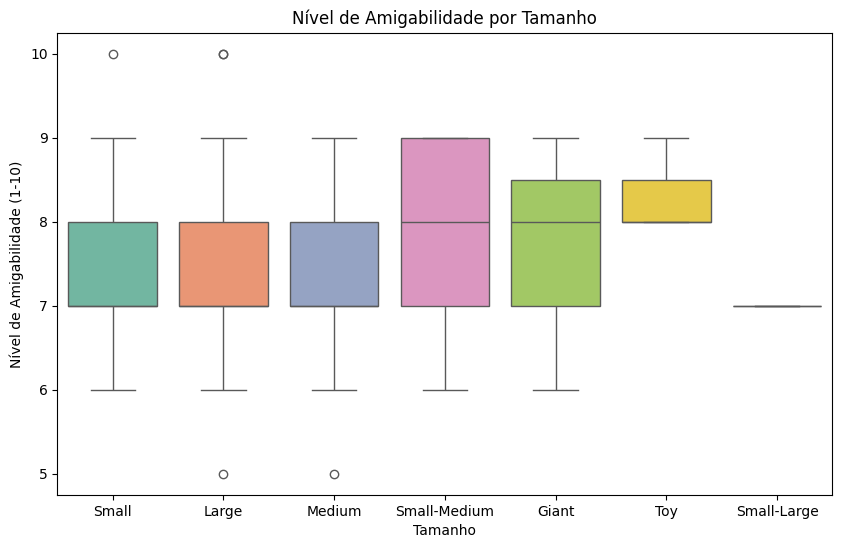

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Size', y='Friendly Rating (1-10)', data=df, palette='Set2')
plt.title('Nível de Amigabilidade por Tamanho')
plt.xlabel('Tamanho')
plt.ylabel('Nível de Amigabilidade (1-10)')
plt.show()

C:\Users\joaov\AppData\Local\Temp\ipykernel_13588\2152092852.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=intelligence_by_origin.index, x=intelligence_by_origin.values, palette='viridis')


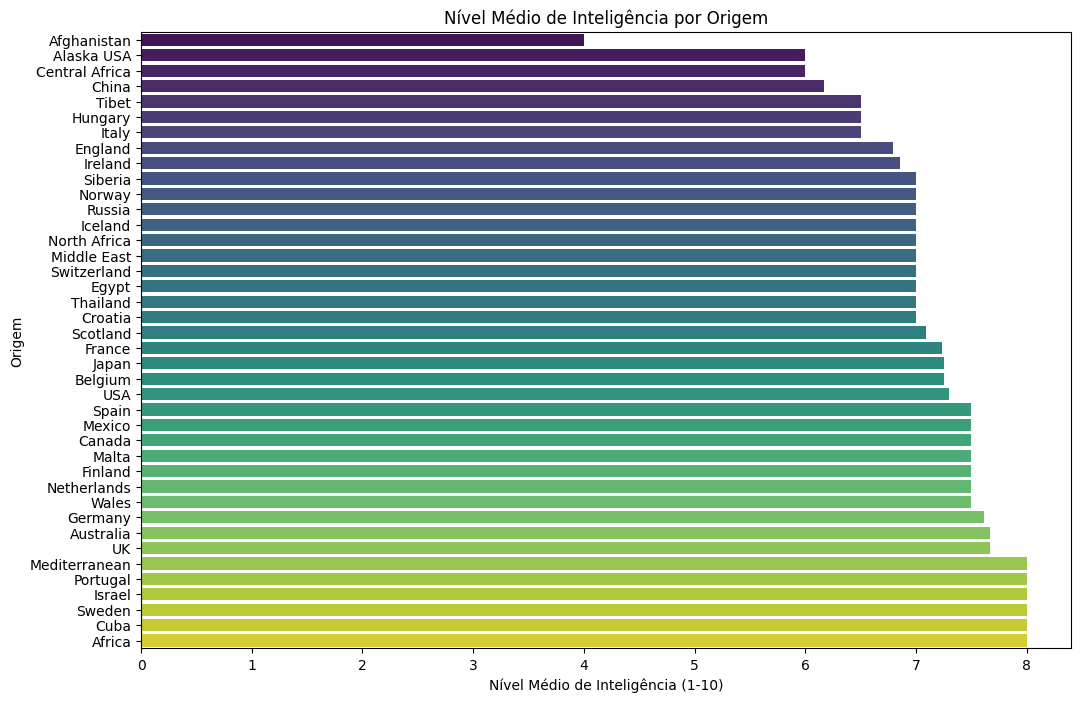

In [39]:
plt.figure(figsize=(12, 8))
intelligence_by_origin = df.groupby('Origin')['Intelligence Rating (1-10)'].mean().sort_values()
sns.barplot(y=intelligence_by_origin.index, x=intelligence_by_origin.values, palette='viridis')
plt.title('Nível Médio de Inteligência por Origem')
plt.xlabel('Nível Médio de Inteligência (1-10)')
plt.ylabel('Origem')
plt.show()